In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization of NN


Beale Function을 이용하여 한번 다양한 NN optimzation 함수를 구현해보고 해결해 봅시다! 각 최적화 기법들의 특징들을 살펴봅시다.

- Contents
    - GD & SGD
    - Momentum
    - Adagrad
    - RMSprop
    - Adam

## Gradient Descent


Gradient descent는 제약조건이 없는 convex이고 differentiable한 function의 최적화 문제를 풀기위한 가장 단순한 알고리즘이다.    


$$
\mathbf{w}_{t+1} = \mathbf{w}_{t} - \eta_{t} \frac{\partial \mathcal{L}}{\partial \mathbf{w}_{t}}
$$

In [65]:
# setup function
f = lambda x,y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 -x+x*y**3)**2
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

def gradients(x, y):
    dx = 2. * ( (1.5 - x + x * y) * (y - 1) + \
                (2.25 - x + x * y**2) * (y**2 - 1) + \
                (2.625 - x + x * y**3) * (y**3 - 1) )
    dy = 2. * ( (1.5 - x + x * y) * x + \
              (2.25 - x + x * y**2) * 2. * x * y + \
              (2.625 - x + x * y**3) * 3. * x * y**2 )
    grads = np.array([dx, dy])
    return grads

In [73]:
class GradientDesecnt():
    def __init__(self, function, x_init=None, y_init=None, learning_rate=0.01):
        self.f = function
        scale = 3.0
        if x_init is not None:
            self.x = x_init
        else:
            self.x = np.random.uniform(low=-scale, high = scale)
        if y_init is not None:
            self.y = y_init
        else:
            self.y = np.random.uniform(low=-scale, high = scale)
        print("x_init:{:.3f}".format(self.x))
        print("y_init:{:.3f}".format(self.y))
        
        self.lr = learning_rate

        self.z_history = []
        self.x_history = []
        self.y_history = []
    
    def func(self, x, y):
        z = self.f(x,y)
        return z

    def gradient(self,x,y):
        dx = 2. * ( (1.5 - x + x * y) * (y - 1) + \
                (2.25 - x + x * y**2) * (y**2 - 1) + \
                (2.625 - x + x * y**3) * (y**3 - 1) )
        dy = 2. * ( (1.5 - x + x * y) * x + \
                (2.25 - x + x * y**2) * 2. * x * y + \
                (2.625 - x + x * y**3) * 3. * x * y**2 )
        return dx, dy
    
    def weights_update(self):
        self.x = self.x - self.lr * self.dx
        self.y = self.y - self.lr * self.dy
    
    def history_update(self, z, x, y):
        self.z_history.append(z)
        self.x_history.append(x)
        self.y_history.append(y)
    
    def train(self, max_steps):
        self.z_history = []
        self.x_history = []
        self.y_history = []
        pre_z = 0.0
        print("steps:{} z:{:.6f} x:{:5f} y:{:.5f}".format(0, self.func(self.x, self.y), self.x, self.y))
        
        # range의 변화를 
        for step in range(max_steps):
            self.z = self.func(self.x, self.y)
            self.history_update(self.z, self.x, self.y)
            
            self.dx, self.dy = self.gradient(self.x, self.y)
            
            self.weights_update()
            
            if (step+1) % 100 == 0:
                print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}  dx: {:.5f}  dy: {:.5f}".format(step+1, self.func(self.x, self.y), self.x, self.y, self.dx, self.dy))
                
            if np.abs(pre_z - self.z) < 1e-5:
                print("Enough convergence")
                print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(step+1, self.func(self.x, self.y), self.x, self.y))
                self.z = self.func(self.x, self.y)
                self.history_update(self.z, self.x, self.y)
                break
            
            pre_z = self.z
        
        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)
        self.path = np.concatenate((np.expand_dims(self.x_history,1), np.expand_dims(self.y_history, 1)), axis =1).T

In [74]:
gd = GradientDesecnt(f ,x_init=0.7, y_init=1.4, learning_rate=0.01)

x_init:0.700
y_init:1.400


In [75]:
gd.train(1000)

steps:0 z:26.496662 x:0.700000 y:1.40000
steps: 100  z: 0.096636  x: 2.44472  y: 0.32327  dx: -0.41345  dy: -0.16275
steps: 200  z: 0.021728  x: 2.69244  y: 0.41208  dx: -0.15311  dy: -0.04974
steps: 300  z: 0.007734  x: 2.80373  y: 0.44659  dx: -0.08138  dy: -0.02408
steps: 400  z: 0.003281  x: 2.86728  y: 0.46488  dx: -0.04962  dy: -0.01390
steps: 500  z: 0.001523  x: 2.90744  y: 0.47594  dx: -0.03243  dy: -0.00878
Enough convergence
steps: 516  z: 0.001355  x: 2.91246  y: 0.47730


In [76]:
print("x: {:.4f}  y: {:.4f}".format(gd.x, gd.y))

x: 2.9125  y: 0.4773


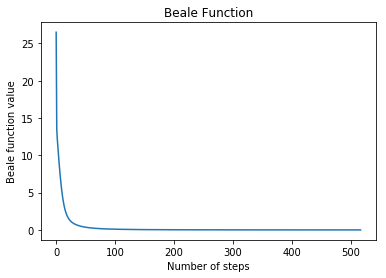

In [77]:
#Plot the Beale function
plt.title('Beale Function')
plt.xlabel('Number of steps')
plt.ylabel('Beale function value')
plt.plot(gd.z_history)
plt.show()

## Stochastic Gradient Descent
* 전체 데이터에서 구하지 않고 mini-batch로 랜덤하게 샘플링하여 loss를 구한다.
    

## Momentum method 
- Velocity variable : v를 도입해보자.
- direction,speed(속력)은 파라미터의 space에서 파라미터의 움직임을 따른다.
- 모멘텀은 물리학에서 mass(질량) x velocity(속도) 이다.
- unit 을 mass로 생각해보자
- hyperparameter γ∈[0,1) determines exponential decay

$$
\begin{align}
\mathbf{v}_{t+1} &= \gamma \mathbf{v}_{t} + \frac{\partial \mathcal{L}(\mathbf{w}_{t})}{\partial \mathbf{w}_{t}}\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} - \eta \mathbf{v}_{t+1}\\
\end{align}
$$

In [110]:
class MomentumOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None, learning_rate=0.01, momentum=0.9):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.vars = np.zeros([2])
        if x_init is not None:
            self.vars[0] = x_init
        else:
            self.vars[0] = np.random.uniform(low=-scale, high=scale)
        if y_init is not None:
            self.vars[1] = y_init
        else:
            self.vars[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.vars[0]))
        print("y_init: {:.3f}".format(self.vars[1]))
        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = np.zeros([2])
        
        # for accumulation of loss and path (w, b)
        self.z_history = []
        self.x_history = []
        self.y_history = []
  
    def func(self, variables):
        x, y = variables
        z = self.f(x, y)
        return z
    
    def gradients(self, variables):
        x, y = variables
        grads = self.g(x, y)
        return grads
    
    def weights_update(self, grads):
        """
          v' = gamma * v + dL/dw
          w' = w - lr * v'
        """
        self.velocity = self.momentum * self.velocity + grads
        self.vars = self.vars - self.lr * self.velocity
        
    
    def weights_update1(self, grads):
        """
          Weights update using Momentum.

          v' = gamma * v - lr * dL/dw
          w' = w + v'
        """
        self.velocity = self.momentum * self.velocity - self.lr * grads
        self.vars = self.vars + self.velocity
    
    def history_update(self, z, x, y):
        self.z_history.append(z)
        self.x_history.append(x)
        self.y_history.append(y)

    
    def train(self, max_steps):
        pre_z = 0.0
        print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(0, self.func(self.vars), self.x, self.y))

        for step in range(max_steps):
            self.z = self.func(self.vars)
            self.history_update(self.z, self.x, self.y)
            
            self.grads = self.gradients(self.vars)
            self.weights_update1(self.grads)

            if (step+1) % 100 == 0:
                print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}  dx: {:.5f}  dy: {:.5f}".format(step+1, self.func(self.vars), self.x, self.y, self.dx, self.dy))

            if np.abs(pre_z - self.z) < 1e-7:
                print("Enough convergence")
                print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(step+1, self.func(self.vars), self.x, self.y))
                self.z = self.func(self.vars)
                self.history_update(self.z, self.x, self.y)
                break

            pre_z = self.z

        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)
        self.path = np.concatenate((np.expand_dims(self.x_history, 1), np.expand_dims(self.y_history, 1)), axis=1).T

    
    @property
    def x(self):
        return self.vars[0]

    @property
    def y(self):
        return self.vars[1]

    @property
    def dx(self):
        return self.grads[0]

    @property
    def dy(self):
        return self.grads[1]

In [111]:
Momentum = MomentumOptimizer(f, gradients, x_init=0.7, y_init=1.4, learning_rate=0.01, momentum=0.9)

x_init: 0.700
y_init: 1.400


In [112]:
Momentum.train(1000)

steps: 0  z: 26.496662  x: 0.70000  y: 1.40000
steps: 100  z: 0.099510  x: 4.46410  y: 0.71417  dx: 0.09680  dy: -0.29558
steps: 200  z: 0.039972  x: 3.70210  y: 0.63209  dx: 0.07884  dy: 0.01149
steps: 300  z: 0.001087  x: 3.08637  y: 0.52077  dx: 0.02342  dy: 0.00558
Enough convergence
steps: 379  z: 0.000001  x: 3.00194  y: 0.50048


In [113]:
print("x: {:.4f}  y: {:.4f}".format(Momentum.x, Momentum.y))

x: 3.0019  y: 0.5005


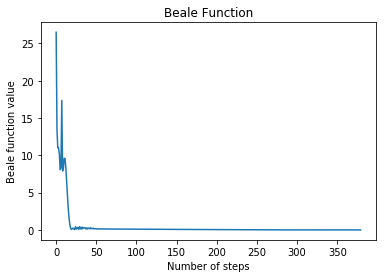

In [114]:
#Plot the Beale function
plt.title('Beale Function')
plt.xlabel('Number of steps')
plt.ylabel('Beale function value')
plt.plot(Momentum.z_history)
plt.show()

## Adagrad
* 경사에 따라서 learning rate를 조금 다르게 해보자. updates를 조절해보자. 
* 파라미터마다 다른 learning rate를 주자.
* 큰 Variation (Gradient) 전에 많이 움직임 : 그렇다면 자주 업데이트 되는 파라미터와
* 작은 Variation (Gradient) 전에 많이 안 움직임 : 자주 업데이트 안되는 파라미터는 무엇인가!
* Learning rate를 Gradient Variation로 나눠서, 수식을 바꾼것이다.
    * Problem : Decays to zero -> 학습속도가 매우 느려진다.

### RMSprop
* To resolve diminishing learning rate
* Moving average of squared gradient : 무지하게 커지니까 앞에 있는걸, Learning rate의 패널티를 moving average 해준다.


### Adam
* RMSprop + Momentum
* moving average of past and past squared gradients
* Weight update